# Individual Planning Stage

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.rows = 6)
options(scipen = 999)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("data/players.csv")
players
sessions <- read_csv("data/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1719770000000,1719770000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1718670000000,1718670000000
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1721930000000,1721930000000
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1721880000000,1721880000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1716650000000,1716650000000
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1719160000000,1719160000000
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1713170000000,1713170000000
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1726880000000,1726890000000
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1718940000000,1718940000000


# 1. Data Description

## Players Data

The players dataset contains data on 196 players, capturing various characteristics and behaviors. The dataset consists of the following key attributes:
1. **experience**(chr): Categorized into levels such as Pro, Veteran, Regular, and Amateur, representing a player's experience.
2. **subscribe**(lgl): (TRUE or FALSE) indicating whether the player subscribe to the server.
3. **hashedEmail**(chr): Hashed representation of the player's email.
4. **played_hours**(dbl): The total hours the player has spent playing.
5. **name**(chr): The player's name.
6. **gender**(chr): The player's gender.
7. **Age**(dbl): The player's age (in years).

chr = character, lgl = logical, dbl = double

## Sessions Data

The sessions dataset contains 1,535 gaming session records, providing insights into player activity over time. It includes the following attributes:
1. **hashedEmail**(chr): Hashed representation of the player's email.
2. **start_time**(chr): The recorded start time of the session in **DD/MM/YYYY HH:MM** format.
3. **end_time**(chr): The recorded end time of the session in **DD/MM/YYYY HH:MM** format.
4. **original_start_time**(dbl): A numeric timestamp (possibly in Unix epoch format) representing the session's start.
5. **original_end_time**(dbl): A numeric timestamp (possibly in Unix epoch format) representing the session's end.

# 2. Question

The question that we aim to answer is "which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts?". Specifically Can player experience level, age, gender, and subscription predict the total amount of playtime in dataset?

## Response Variable : played_hours

## Exploratory Variable : experience, subscribe, gender, and age

## Data Wragling Plan

Before we analyze the data, we should make the data becomes tidy, structured format and can be a predictive modelling.

1. Filter and Select Columns
   - Just Focus on the response and explanatory variables
   - Check any missing values in each columns, and decide to include those or not.
2. Convert Data Types
   - experience and gender should be categorical variables
   - age and played_hours should remain numeric
3. Aggregate and scaling predictors

# 3. Exploratory Data Analysis and Visualization

experience,subscribe,gender,Age,played_hours
<fct>,<lgl>,<fct>,<dbl>,<dbl>
Pro,TRUE,Male,9,30.3
Veteran,TRUE,Male,17,3.8
Veteran,FALSE,Male,17,0.0
Amateur,TRUE,Female,21,0.7
Regular,TRUE,Male,21,0.1
Amateur,TRUE,Female,17,0.0
Regular,TRUE,Female,19,0.0
Amateur,FALSE,Male,21,0.0
Amateur,TRUE,Male,17,0.1


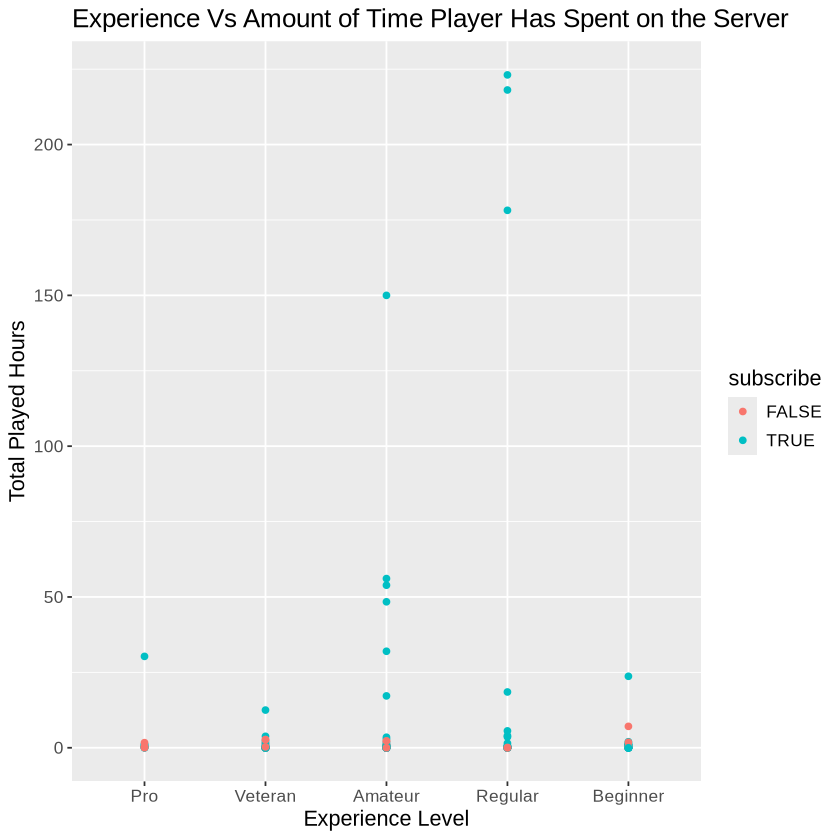

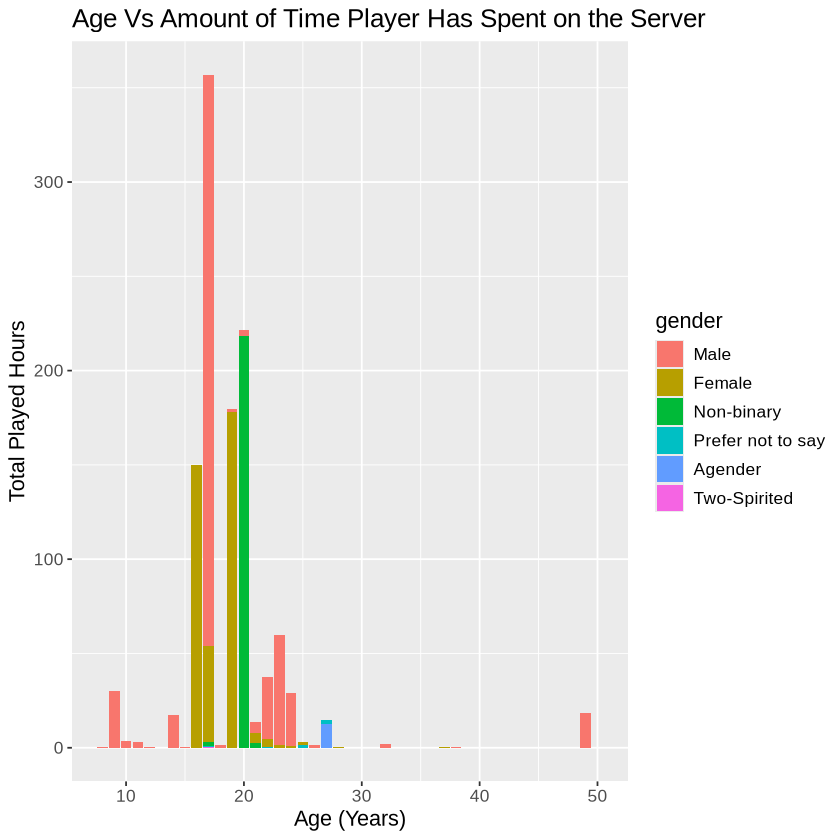

In [11]:
#Tidy the players data
tidy_players <- players |>
    select(experience, subscribe, gender, Age, played_hours) |>
    mutate(experience = as_factor(experience)) |>
    mutate(gender = as_factor(gender)) |>
    filter(!is.na(played_hours) & !is.na(Age))
tidy_players

#Visualize the data
plot1 <- tidy_players |>
    ggplot(aes (x = experience, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Experience Level", y = "Total Played Hours", color = "subscribe",
         title = "Experience Vs Amount of Time Player Has Spent on the Server") +
    theme(text = element_text(size=13))
plot1

plot2 <- tidy_players |>
    ggplot(aes (x = Age, y = played_hours, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(x = "Age (Years)", y = "Total Played Hours", fill = "gender",
         title = "Age Vs Amount of Time Player Has Spent on the Server") +
    theme(text = element_text(size=13))
plot2

1. Experience vs Played Hours plot
   - Shows the relationship between player experience and total hours played.
   - Colors indicate subscription status (Blue = Subscribed, Red = Not Subscribed).
2. Age vs Played hours plot
   - Show the amount of time player spend across different ages, with fill color representing gender.

# 4. Method and Plan

I will use k-nn regression model to answer this question by predicting the played_hours as a continuous response variable based on four predictors. Using the best k that we find by cross-validation.

## Assumptions

1. Assumes a non-linear relationship between the predictors and the response variable

## Limitations

1. If the relationship is linear, k-nn regression might underperform

## Model Selection, Comparison, and Data Processing

1. Split the data into training and testing by 80/20
2. Use cross-validation to find the best k for this k-nn regression
3. Calculate RMSPE
4. Train the final model on the full training data with the selected parameters.
5. Test the final model on the holdout test set to validate performance.